In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma0.pickle', 'rb')
solutions = pickle.load(file)
file.close()

In [3]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

[0.06512987769964532, 0.014899364123780212, 0.008023768036481024, 0.029312035950295412, 0.025864830037254434, 0.05548569628855542, 0.022695528787297886, 0.06798760365755635, 0.06965267132488473, 0.05309783176410367, 0.04917632614092345, 0.029466203290584612, 0.05386172219105496, 0.059782081069456726, 0.03129615813476471, 0.04245299424779318, 0.04448331703134829, 0.04860343016731691, 0.026152266505615782, 0.025831220508154198, 0.0270236876572477, 0.01823997208538496, 0.0040590342333408904, -0.0036819381001730977, -0.030726856498266265, 0.012080354719630862, -0.03984146696163773, -0.054039465158623345, -0.05602457250776012, -0.03349943827903823, -0.015884844872679257, 0.001742366947762773, -0.006213119780752274, -0.045216039170272254, -0.018300962435817907, -0.03726494166462148, -0.05017001631402799, -0.023653251372166288, -0.010113600374873168, -0.013717220324381925, -0.02794372199599747, -0.0018421694258606487, 0.0007251989958904863, 0.02361204689598649, 0.022541421739401657, 0.0588630

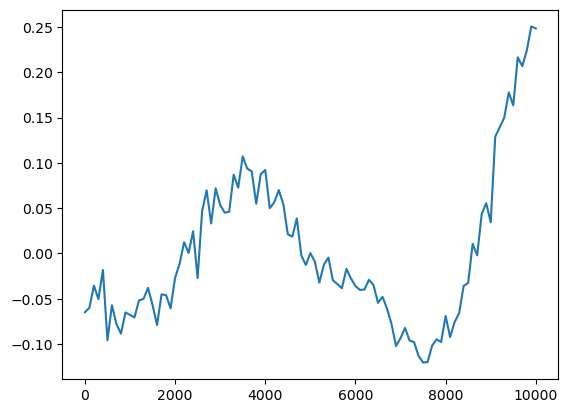

In [4]:
#all velocities in one list
initial_time = 0
time_steps_list =  range(0,10001, 100)
x_vel_list=[]
y_vel_list=[]

for time in time_steps_list:
    x_vel_sum = 0
    y_vel_sum = 0
    for sol in solutions:


        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        new_x = x[time] #finds new indices
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        x_vel_sum += x_vel
        y_vel = vel[1]
        y_vel_sum += y_vel

    x_vel_list.append(x_vel_sum/100)
    y_vel_list.append(y_vel_sum/100)
        
print(x_vel_list)
print(y_vel_list)

fig, ax = plt.subplots()
ax.plot(time_steps_list, y_vel_list)

In [5]:
vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

x_sq = 0
y_sq = 0

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        x_sq += x_vel**2
        y_sq += y_vel**2
        speed_sq = x_sq + y_sq

        dot_prod += initial_y_vel * y_vel 
        
    vaf_list.append(dot_prod/speed_sq) 

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()




KeyboardInterrupt: 

[1.0, 0.9100749866021881, 0.8495835580628147, 0.7875955347923578, 0.7153049585849406, 0.629232330690179, 0.5551968836604371, 0.4692700092416788, 0.3769253771476751, 0.28207751533091807, 0.18711253586894944, 0.1218499011946261, 0.04384735278332799, -0.02454236155447333, -0.08456294563266392, -0.15636604448875124, -0.20877876396161865, -0.25809513579372945, -0.29335268713959806, -0.3309561859915046, -0.3442019625735972, -0.37869998450802533, -0.39367127047896633, -0.40082245090522745, -0.40923389479368943, -0.40785504429001856, -0.4010551640905053, -0.38917393204833556, -0.38937659471800423, -0.37605501173132216, -0.3686616087950998, -0.35616819683233125, -0.34119649401286883, -0.3204786008566403, -0.3169173073991597, -0.3058505614285276, -0.28782858007583023, -0.2750096193820312, -0.2673399189461596, -0.2544604221344775, -0.22873159068196905, -0.20682806402775736, -0.18980216929757962, -0.16614888942975775, -0.12875438095382793, -0.0985915636282451, -0.06929042768324761, -0.038295170495

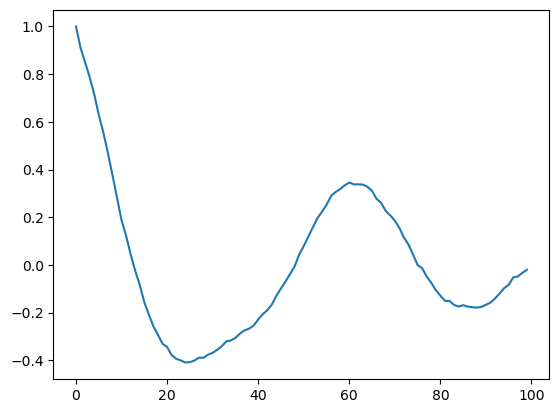

In [12]:
#new method of autocorrelation

y_series_mean = np.mean(y_vel_list)
n = 100
steps_list= range(0, 100)
acf_lag_list=[]

#working out s0
s0 = 0
k = 0
for i in range(1, n+1):
    s0 += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

for k in steps_list:
    acf_lag = 0
    for i in range(1, n-k+1):

        acf_lag += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

    acf_lag_list.append(acf_lag/s0)
    
print(acf_lag_list)
plt.plot(steps_list, acf_lag_list)
plt.show()